In [1]:
%matplotlib inline

In [2]:
import sys
sys.path.insert(0,'..')
import pickle

import visualize
import datasets
import ldle
# Uncomment to reload a library
from importlib import reload 
visualize = reload(visualize)
ldle = reload(ldle)
datasets = reload(datasets)

matplotlib.get_backend() =  module://ipykernel.pylab.backend_inline
matplotlib.get_backend() =  module://ipykernel.pylab.backend_inline


In [3]:
save_dir_root = '../data/ldle/flattorus/'

In [4]:
X, labelsMat, ddX = datasets.Datasets().flattorus4d()

X.shape =  (10000, 4)


# LDLE

In [5]:
ldle_obj = ldle.LDLE(X=X, eta_min=15, max_iter0=20,
                     vis = visualize.Visualize(save_dir_root),
                     vis_y_options = {'cmap0':'summer', # for the interior
                                      'cmap1':'jet', # for the tear
                                      'labels':labelsMat[:,0]})

A_k, Atilde_k: 0 points processed...
A_k, Atilde_k: 2500 points processed...
A_k, Atilde_k: 5000 points processed...
A_k, Atilde_k: 7500 points processed...
Atilde_k, Atilde_k: all points processed...

Constructing low distortion local views using LDLE...
local_param: 0 points processed...
local_param: 2500 points processed...
local_param: 5000 points processed...
local_param: 7500 points processed...
local_param: all 10000 points processed...
After iter 1, max distortion is 1.890006
After iter 2, max distortion is 1.890006
After iter 3, max distortion is 1.655348
After iter 4, max distortion is 1.655348
After iter 5, max distortion is 1.655348
Max local distortion = 1.6553476307698645
###############
Took 79.5 seconds to perform step 1: construct low distoriton local views
###############

Clustering to obtain low distortion intermediate views...
# non-empty views with sz < 2 = 10000
#nodes in views with sz < 2 = 10000
Remaining #nodes in views with sz < 2 = 0
# non-empty views with s

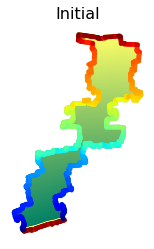

###############
Took 8.1 seconds to compute initial global embedding.
###############

Refining parameters and computing final global embedding...
Using GPA...
Iteration: 0
error: 7.26006389945596e-05


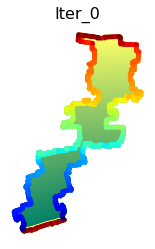

Iteration: 1
error: 7.038202743885259e-05
Iteration: 2
error: 6.963663146937673e-05
Iteration: 3
error: 6.939557252427702e-05
Iteration: 4
error: 6.927253646352167e-05
Iteration: 5
error: 6.921428409048283e-05


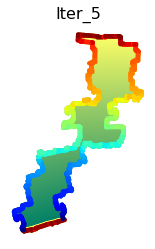

Iteration: 6
error: 6.917422678799852e-05
Iteration: 7
error: 6.913978941605004e-05
Iteration: 8
error: 6.911185959660338e-05
Iteration: 9
error: 6.907812994983723e-05
Iteration: 10
error: 6.905395370020054e-05


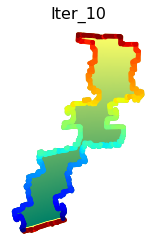

Iteration: 11
error: 6.902436515781598e-05
Iteration: 12
error: 6.900162240702983e-05
Iteration: 13
error: 6.897612320126765e-05
Iteration: 14
error: 6.895169400073638e-05
Iteration: 15
error: 6.892768706435925e-05


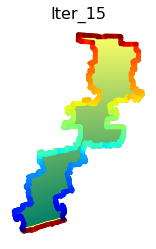

Iteration: 16
error: 6.890439402868807e-05
Iteration: 17
error: 6.888158638218819e-05
Iteration: 18
error: 6.885999121783009e-05
Iteration: 19
error: 6.884216070620685e-05


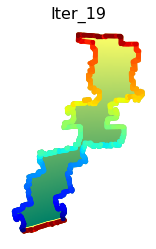

###############
Took 251.4 seconds to refine global embedding.
###############
###############
Took 260.9 seconds to perform step 3: compute global embedding.
###############


In [6]:
ldle_obj.fit()

# Optionally save for further visualizations using Visualization.ipynb

In [7]:
save_path = save_dir_root+'/ldle_obj.dat'
with open(save_path, "wb") as f:
    pickle.dump([X, labelsMat, ldle_obj], f)

# LTSA

In [20]:
from sklearn.manifold import LocallyLinearEmbedding
import visualize
vis = visualize.Visualize(save_dir_root)

In [21]:
ltsa_obj = LocallyLinearEmbedding(method='ltsa', n_neighbors=25, n_components=2, n_jobs=-1, random_state=42)

In [22]:
y_ltsa = ltsa_obj.fit_transform(X)

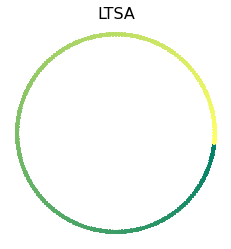

In [23]:
vis.global_embedding(y_ltsa, labelsMat[:,0], 'summer', title='LTSA')

# UMAP

In [24]:
from umap import UMAP
import visualize
vis = visualize.Visualize(save_dir_root)

In [25]:
umap_obj = UMAP(n_neighbors=200, min_dist=0.5, n_components=2,
                random_state=42, n_epochs=500, metric='euclidean')

In [26]:
y_umap = umap_obj.fit_transform(X)

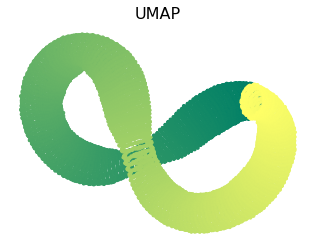

In [27]:
vis.global_embedding(y_umap, labelsMat[:,0], 'summer', title='UMAP')

# t-SNE

In [28]:
from sklearn.manifold import TSNE
import visualize
vis = visualize.Visualize(save_dir_root)

In [29]:
tsne_obj = TSNE(perplexity=60, early_exaggeration=6, n_components=2,
                metric='euclidean', random_state=42, n_iter=1000,
                n_jobs=-1, init='random')

In [30]:
y_tsne = tsne_obj.fit_transform(X)

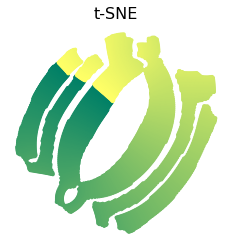

In [31]:
vis.global_embedding(y_tsne, labelsMat[:,0], 'summer', title='t-SNE')